<a href="https://colab.research.google.com/github/aminabyaneh/Machine_Learning/blob/master/Various_Classification_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Various Classification Approaches

## LDA, NB, LR



Digits is a dataset of handwritten digits. Each feature is the intensity of one pixel of an 8 x 8 image. This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.
First we import the digits dataset from **sklearn.datasets** and load it using **load_digits()** funciton. Then we print the shape of features and labels.

In [0]:
# loading digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print('shape of digits data:', digits.data.shape)
print('shape of digits target:', digits.target.shape)

shape of digits data: (1797, 64)
shape of digits target: (1797,)


Using **subplot** we plot the first 10 training examples from dataset. 

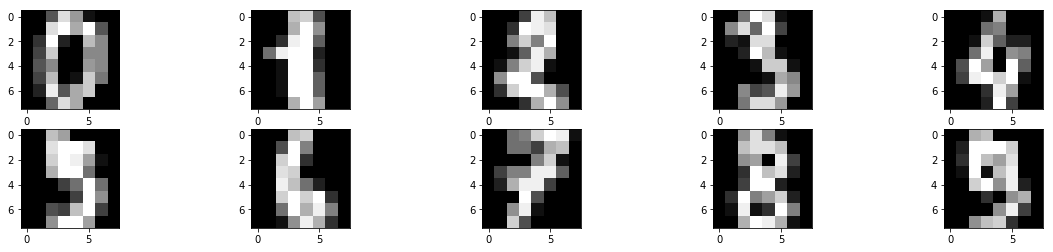

In [0]:
# plotting some of data
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
  plt.subplot(2, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

### LDA classification
Linear Discriminant Analysis (LDA) is a classification method. It is simple, mathematically robust and often produces models whose accuracy is as good as more complex methods.
LDA is based upon the concept of searching for a linear combination of variables (predictors) that best separates two classes (targets).
If we have more than two classes then Linear Discriminant Analysis is the preferred linear classification technique.
For a single input variable (x) this is the mean and the variance of the variable for each class. For multiple variables, this is the same properties calculated over the multivariate Gaussian, namely the means and the covariance matrix.
These statistical properties are estimated from we data and plug into the LDA equation to make predictions. These are the model values that we would save to file for our model.
LDA makes some simplifying assumptions about your data:

1.   That our data is Gaussian, each variable is is shaped like a bell curve when plotted.
2.   That each attribute has the same variance, that values of each variable vary around the mean by the same amount on average.

We first split the test and train data. Twenty percent of our total dataset is set to be used as test data, the rest, however, as train data. To achieve this goal, we use **train_test_split** from **sklearn.model_selection** to split 20% of our data as test and the rest as train samples.
More information about sklearn train_test_split on [sklearn webpage](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [0]:
# split train data from test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.2)

print('shape of X_train:', X_train.shape, ' \tshape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape, ' \tshape of y_test:', y_test.shape)

shape of X_train: (1437, 64)  	shape of X_test: (360, 64)
shape of y_train: (1437,)  	shape of y_test: (360,)


Next, we use LDA from sklearn library. 

***sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver=’svd’, shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)***

It provides the following solvers from which we decided to use svd after exploring the defenition of these solvers.
The default solver is **‘svd’**. It can perform both classification and transform, and it does not rely on the calculation of the covariance matrix. This can be an advantage in situations where the number of features is large. However, the ‘svd’ solver cannot be used with shrinkage. The **‘lsqr’** solver is an efficient algorithm that only works for classification. It supports shrinkage. The **‘eigen’** solver is based on the optimization of the between class scatter to within class scatter ratio. It can be used for both classification and transform, and it supports shrinkage. However, the ‘eigen’ solver needs to compute the covariance matrix, so it might not be suitable for situations with a high number of features. More information about sklearn LDA on [sklearn webpage](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).


In [0]:
# train a lda model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='svd', store_covariance=True)
y_lda_pred = lda.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Score of this model is calculated using **score()** method. 

In [0]:
# calculate the score of model
lda.score(X_test, y_test, sample_weight=None)

0.9416666666666667

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Also confusion matrix is a technique for summarizing the performance of a classification algorithm.

Classification accuracy alone can be misleading if we have an unequal number of observations in each class or if we have more than two classes in your dataset. Calculating a confusion matrix can give us a better idea of what our classification model is getting right and what types of errors it is making. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by our classifier but more importantly the types of errors that are being made.



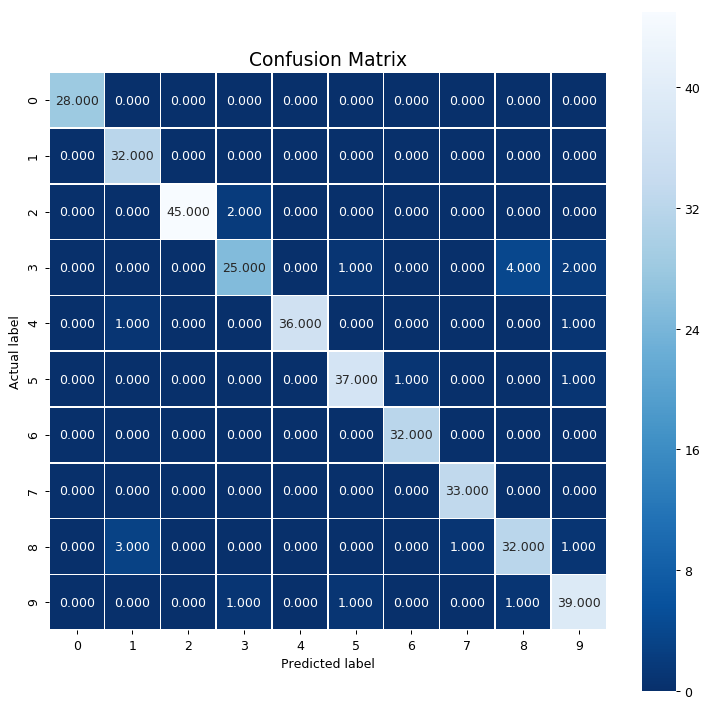

In [0]:
# calculating confusion matrix
def cm_plot(y_test, y_pred):
  from sklearn import metrics
  cm = metrics.confusion_matrix(y_test, y_pred)

  import seaborn as sns
  plt.figure(figsize=(10, 10), dpi=90)
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  plt.title('Confusion Matrix', size = 15);
  
cm_plot(y_test, y_lda_pred)

We descrive the above confusion matrix for linear discremental analysis method in digits data in next few lines.

*   Model has never mistaken 0 for any other digits in our dataset.
*   9 and 5 are repeatedly predicted incorrectly by our model.
*   8 and 2 are the next two most incorrectly predicted numbers.
*   Model performs well in most other cases except 4 that is predicted incorrectly for both 7, 8.


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


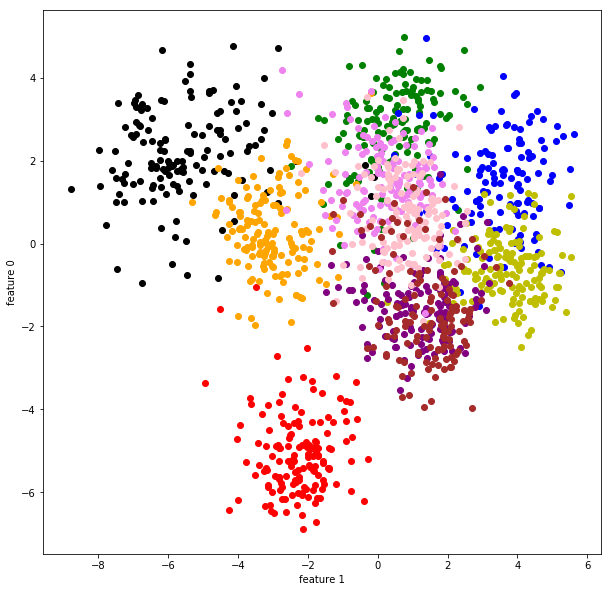

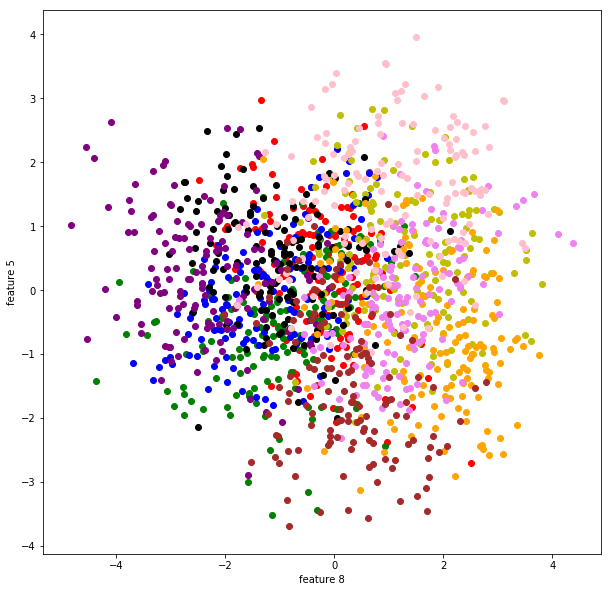

In [0]:
# plot the classification results
colors =  ['r', 'g', 'b', 'y', 'black', 'purple', 'orange', 'violet', 'pink', 'brown']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data_projected = lda.fit_transform(X_train, y_train)

for l, c in zip(np.unique(y_train), colors):
    ax.scatter(data_projected[:,0][y_train==l], data_projected[:,1][y_train==l],
                c=c, marker='o')
    ax.set_ylabel('feature 0')
    ax.set_xlabel('feature 1')
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data_projected = lda.fit_transform(X_train, y_train)

for l, c in zip(np.unique(y_train), colors):
    ax.scatter(data_projected[:,5][y_train==l], data_projected[:,8][y_train==l],
                c=c, marker='o')
    ax.set_ylabel('feature 5')
    ax.set_xlabel('feature 8')

### QDA classification

Quadratic Discriminant Analysis (QDA) is a classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

Quadratic discriminant analysis provides an alternative approach. Like LDA, the QDA classifier assumes that the observations from each class of Y are drawn from a Gaussian distribution. However, unlike LDA, QDA assumes that each class has its own covariance matrix. In other words, the predictor variables are not assumed to have common variance across each of the k levels in Y. 
In trying to classify the observations into the three (color-coded) classes, LDA (left plot) provides linear decision boundaries that are based on the assumption that the observations vary consistently across all classes. However, when looking at the data it becomes apparent that the variability of the observations within each class differ. Consequently, QDA (right plot) is able to capture the differing covariances and provide more accurate non-linear classification decision boundaries.




We import **QuadraticDiscriminantAnalysis** from **sklearn.discriminant_analysis** to use QDA algorithm on our X_train and y_train dataset. More info about this library is on [sklearn webpage](https://scikit-learn.org/0.15/modules/generated/sklearn.qda.QDA.html).
store_covariances : boolean If True the covariance matrices are computed and stored in the self.covariances_ attribute. We then print covariance data to achieve partial sense about QDA calculation.

In [0]:
# train a qda model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA(store_covariance=True)
y_qda_pred = qda.fit(X_train, y_train).predict(X_test)
print(qda.covariances_)

[array([[ 3.57434421e-31, -1.30609205e-18,  9.33855812e-17, ...,
         3.30114764e-16,  3.78766693e-17,  0.00000000e+00],
       [-1.30609205e-18,  5.29753915e-02, -2.50559284e-03, ...,
         8.69798658e-02,  8.78747204e-02,  0.00000000e+00],
       [ 9.33855812e-17, -2.50559284e-03,  8.59525727e+00, ...,
        -3.05798658e+00, -3.30022371e-01,  0.00000000e+00],
       ...,
       [ 3.30114764e-16,  8.69798658e-02, -3.05798658e+00, ...,
         1.52272483e+01,  1.75275168e+00,  0.00000000e+00],
       [ 3.78766693e-17,  8.78747204e-02, -3.30022371e-01, ...,
         1.75275168e+00,  6.73109620e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.57434421e-31]]), array([[ 1.51791825e-30, -1.34576675e-18,  3.18946719e-16, ...,
        -6.93069875e-17, -3.44516288e-16, -1.72258144e-16],
       [-1.34576675e-18,  1.32438479e-02,  1.22953020e-01, ...,
        -6.29082774e-02, -3.91051454e-02, -2.29082774

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

Score returns the mean accuracy on the given test data and labels. 


In [0]:
# calculate the score of model
qda.score(X_test, y_test, sample_weight=None)

0.7583333333333333

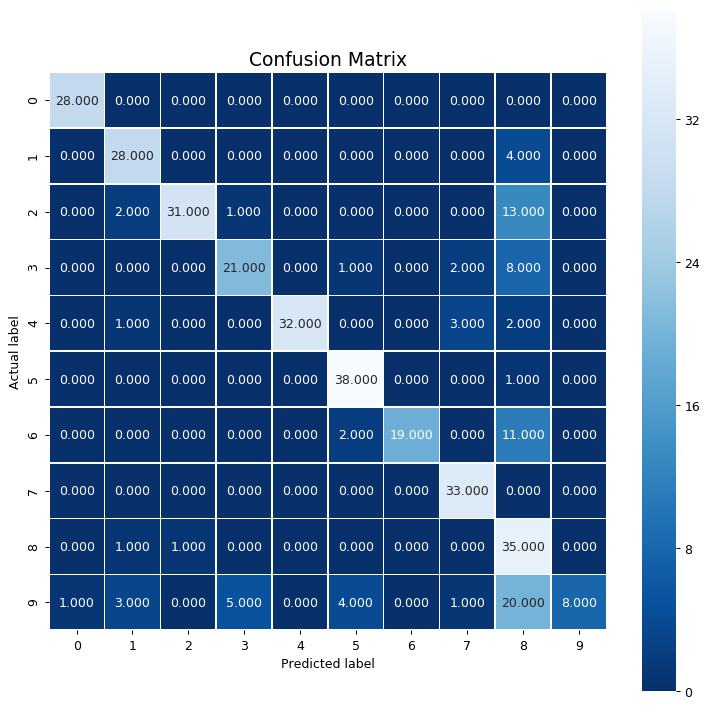

In [0]:
cm_plot(y_test, y_qda_pred)

We descrive the above confusion matrix for quadratic discremental analysis method in digits data in next few lines.

*   Model has never mistaken 0 for any other digits in our dataset. This implies that 0 is different enough from the rest of digits to be distinguished properly.
*   3 and 8 are repeatedly predicted incorrectly by our model.
*   7 and 4 are the next two most incorrectly predicted numbers. 4 was a problematic number in LDA too.
*   Model performs well in most other cases except 8 that is predicted incorrectly for all 9, 3, 2, 1 digits.



### Naive Bayes

The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of conditional probability. In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

**MultinomialNB** implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).

In [0]:
# using multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_mnb_pred = mnb.fit(X_train, y_train).predict(X_test)

score = ((y_test == y_mnb_pred).sum()) / len(y_test)
print(score)

0.8777777777777778


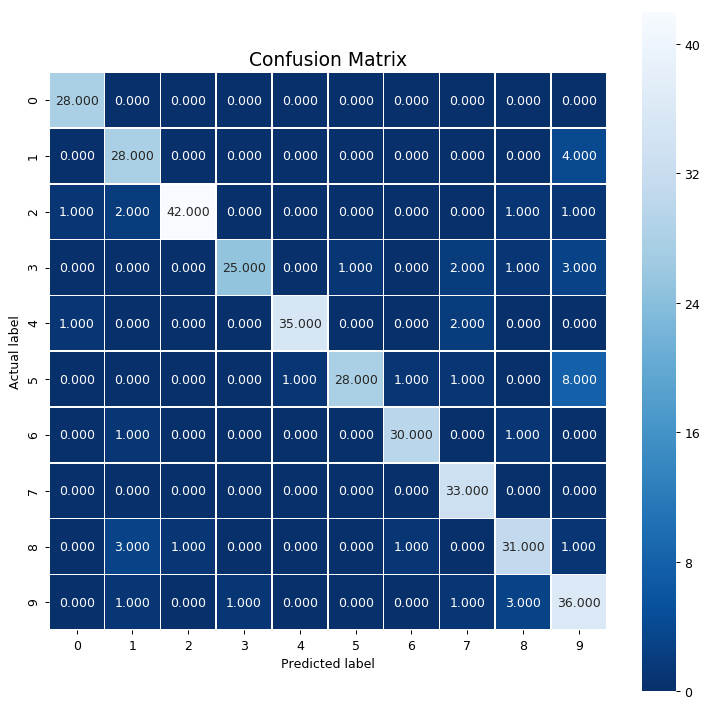

In [0]:
cm_plot(y_test, y_mnb_pred)

We descrive the above confusion matrix for MultinomialNB method in digits data in next few lines.

*   Model, as always, has never mistaken 0 for any other digits in our dataset.
*   9 and 1 are repeatedly predicted incorrectly by our model.
*   8 and 9 are the next two most incorrectly predicted numbers.
*   Model performs well in most other cases except 9 that is predicted incorrectly for 1, 3, 4, 8 most of the times.


**ComplementNB** implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks.

In [0]:
# using complement naive bayes
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
y_cnb_pred = cnb.fit(X_train, y_train).predict(X_test)

score = ((y_test == y_cnb_pred).sum()) / len(y_test)
print(score)

NameError: ignored

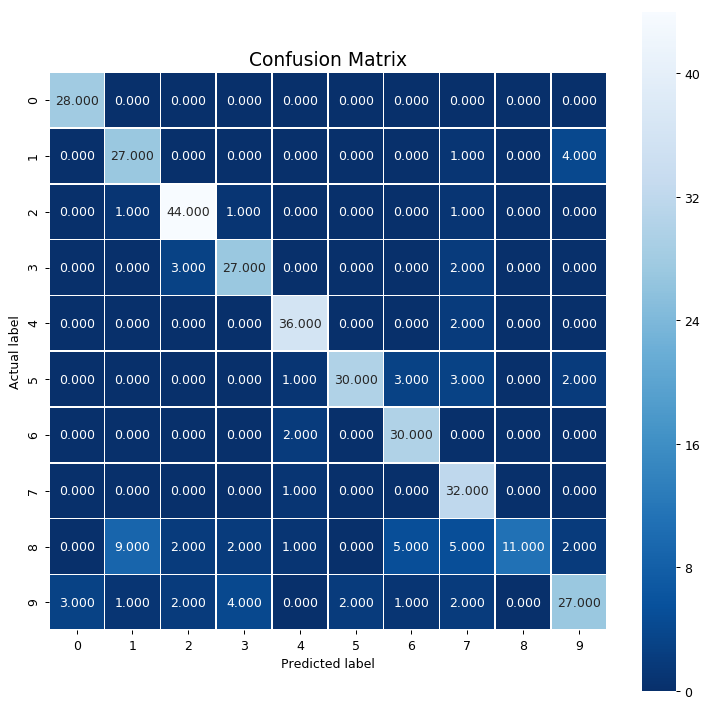

In [0]:
cm_plot(y_test, y_cnb_pred)

We descrive the above confusion matrix for ComplementNB method in digits data in next few lines.

*   Model, as always, has never mistaken 0 for any other digits in our dataset.
*   9 and 1 are repeatedly predicted incorrectly by our model.
*   8 and 6 are the next two most incorrectly predicted numbers.
*   Model performs well in most other cases except 8 that is predicted incorrectly for all the numbers except  0 most of the times.


**BernoulliNB** implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors.

In [0]:
# using bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_bnb_pred = bnb.fit(X_train, y_train).predict(X_test)

score = ((y_test == y_bnb_pred).sum()) / len(y_test)
print(score)

0.8444444444444444


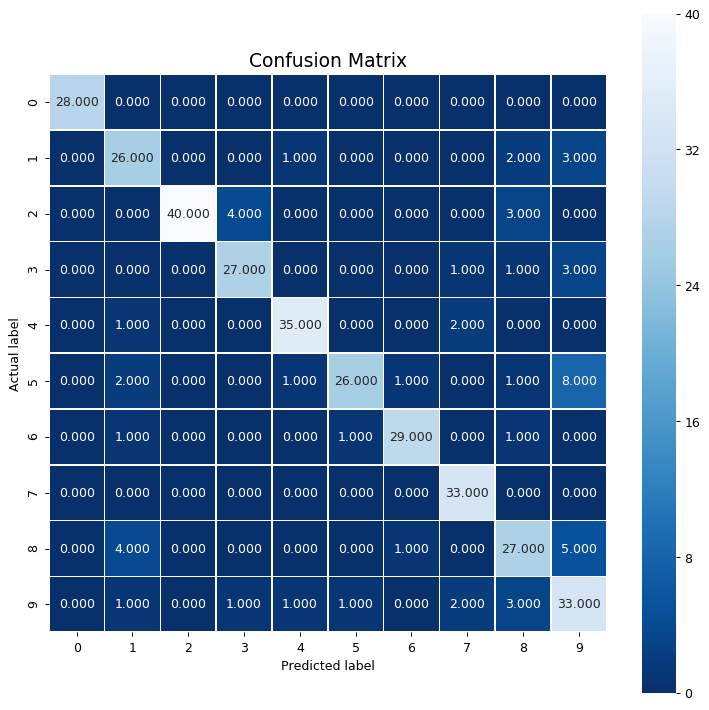

In [0]:
cm_plot(y_test, y_bnb_pred)

We descrive the above confusion matrix for BernouliNB method in digits data in next few lines.

*   Model, as always, has never mistaken 0 for any other digits in our dataset.
*   9 and 1 are repeatedly predicted incorrectly by our model.
*   8 and 1 are the next two most incorrectly predicted numbers.
*   Model performs well in most other cases except 9 that is predicted incorrectly for 1, 3, 5, 8 plenty of the times.





**GaussianNB** implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [0]:
# using guassian naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

score = ((y_test == y_gnb_pred).sum()) / len(y_test)
print(score)

0.7722222222222223


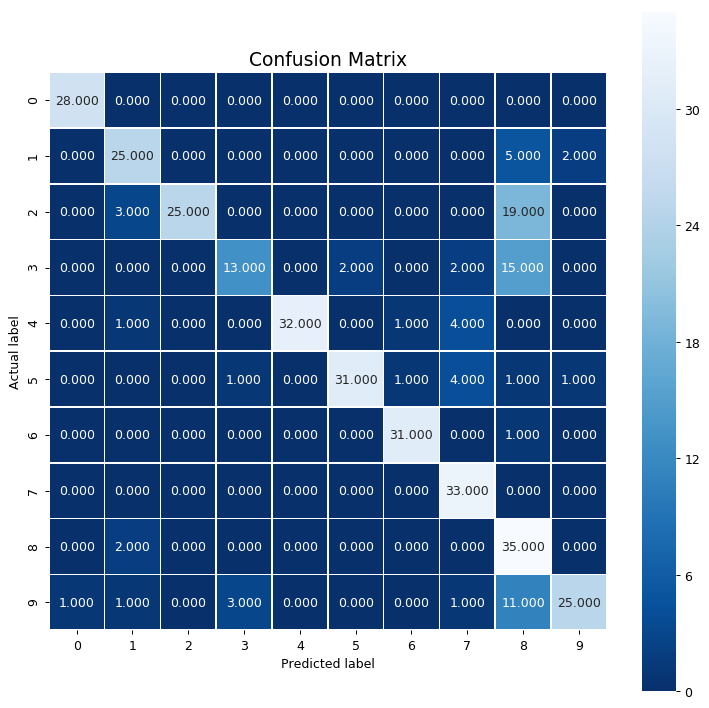

In [0]:
cm_plot(y_test, y_gnb_pred)

We descrive the above confusion matrix for GuassianNB method in digits data in next few lines.

*   Model, as always, has never mistaken 0 for any other digits in our dataset.
*   2 and 8 are repeatedly predicted incorrectly by our model.
*   8 and 9 are the next two most incorrectly predicted numbers.
*   Model performs well in most other cases except 8 that is predicted incorrectly for all the numbers except 0, 6 plenty of the times.


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(fit_intercept=True, solver='sag', multi_class='multinomial')
y_lr_pred = lr.fit(X_train, y_train).predict(X_test)
lr.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.95

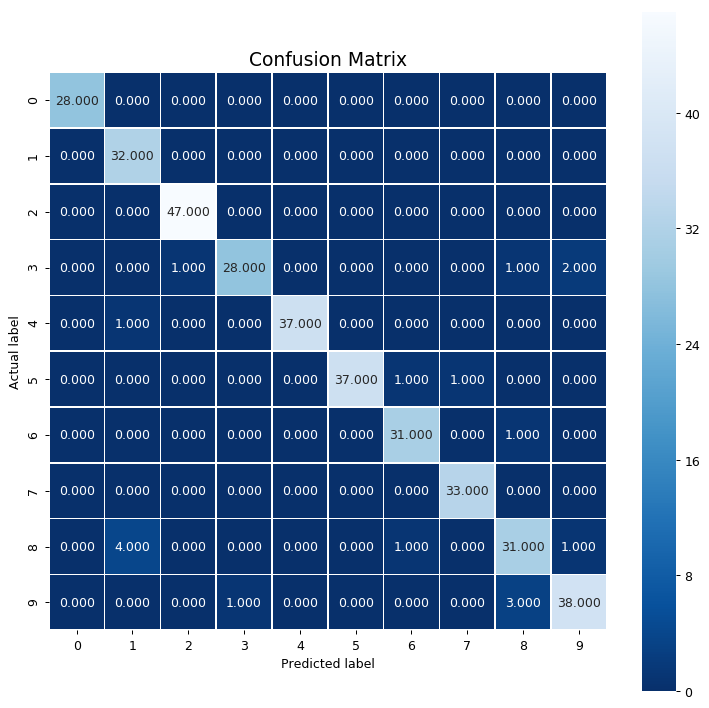

In [0]:
cm_plot(y_test, y_lr_pred)

As it may be seen, for logistic regression the errors are much smoother than all previous methods. We do not see any specific number or class which takes a considerable part in error results.

### Error Comparison

Comparing score of all of these methods on digits datatset we acquire the following table as a result. Best error results is produced by LDA.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#9ABAD9;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:8px 20px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#9ABAD9;color:#444;background-color:#EBF5FF;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:8px 20px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#9ABAD9;color:#fff;background-color:#409cff;}
.tg .tg-yt7x{background-color:#D2E4FC;font-size:14px;text-align:center;vertical-align:top}
.tg .tg-hmp3{background-color:#D2E4FC;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-j0tj{background-color:#D2E4FC;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Method</th>
    <th class="tg-0lax">LDA</th>
    <th class="tg-0lax">QDA</th>
    <th class="tg-0lax">MultinomialNB</th>
    <th class="tg-0lax">ComplementNB</th>
    <th class="tg-0lax">BernouliNB</th>
    <th class="tg-0lax">GuassianNB</th>
    <th class="tg-0lax">Logistic Regression</th>
  </tr>
  <tr>
    <td class="tg-0pky">Score<br></td>
    <td class="tg-j0tj">0.961</td>
    <td class="tg-j0tj">0.814</td>
    <td class="tg-j0tj">0.897</td>
    <td class="tg-j0tj">0.825</td>
    <td class="tg-j0tj">0.875</td>
    <td class="tg-j0tj">0.833</td>
    <td class="tg-yt7x">0.942</td>
  </tr>
</table>

## Problem 6


In [0]:
# fetch the data from online repository
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
!mv default\ of\ credit\ card\ clients.xls dataset.xls

--2019-04-26 16:24:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls’

default of credit c 100%[===================>]   5.28M  21.1MB/s    in 0.3s    

2019-04-26 16:24:25 (21.1 MB/s) - ‘default of credit card clients.xls’ saved [5539328/5539328]



In [0]:
import pandas as pd
df = pd.read_excel("dataset.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [0]:
df.count()

Unnamed: 0    30001
X1            30001
X2            30001
X3            30001
X4            30001
X5            30001
X6            30001
X7            30001
X8            30001
X9            30001
X10           30001
X11           30001
X12           30001
X13           30001
X14           30001
X15           30001
X16           30001
X17           30001
X18           30001
X19           30001
X20           30001
X21           30001
X22           30001
X23           30001
Y             30001
dtype: int64

In [0]:
df = df.loc[:, df.columns.intersection(['X1', 'X12', 'X13', 'X3', 'Y'])]
df.head()

,X1,X3,X12,X13,Y
0,LIMIT_BAL,EDUCATION,BILL_AMT1,BILL_AMT2,default payment next month
1,20000,2,3913,3102,1
2,120000,2,2682,1725,1
3,90000,2,29239,14027,0
4,50000,2,46990,48233,0


In [0]:
data = np.asarray(df.loc[1:, df.columns.intersection(['X1', 'X12', 'X13'])]).astype('int')
target = np.array(df.loc[1:, 'Y']).astype('int')
print(data.shape, target.shape, data[0][0], target[0])

(30000, 3) (30000,) 20000 1


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print('shape of X_train:', X_train.shape, ' \tshape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape, ' \tshape of y_test:', y_test.shape)

shape of X_train: (24000, 3)  	shape of X_test: (6000, 3)
shape of y_train: (24000,)  	shape of y_test: (6000,)


In [0]:
# train the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='svd', store_covariance=True)

In [0]:
# calculate the score of model
y_lda_pred = lda.fit(X_train, y_train).predict(X_test)
lda.score(X_test, y_test, sample_weight=None)

0.7755

In [0]:
results = np.zeros(3)

for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  y_lda_pred = lda.fit(X_train, y_train).predict(X_test)
  results[i] = lda.score(X_test, y_test, sample_weight=None)
  
print('Mean of error for 3-fold cross-validation:', results.mean())

Mean of error for 3-fold cross-validation: 0.7795555555555556


In [0]:
data = np.asarray(df.loc[1:, df.columns.intersection(['X1', 'X12', 'X13', 'X3'])]).astype('int')
target = np.array(df.loc[1:, 'Y']).astype('int')
print(data.shape, target.shape, data[0][0], target[0])

(30000, 4) (30000,) 20000 1


In [0]:
results = np.zeros(3)

for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  y_lda_pred = lda.fit(X_train, y_train).predict(X_test)
  results[i] = lda.score(X_test, y_test, sample_weight=None)
  
print('Mean of error for 3-fold cross-validation with X3:', results.mean())

Mean of error for 3-fold cross-validation with X3: 0.779


We observe that Error is always around 0.77. This is the result of unbalanced data. As we have more data in one of the classes we will always end up with predicting the same label and so the error is always around 0.77 since this is the percentage of that label in data set. Machine learning (ML) algorithms are built to minimize errors. Since the probability of instances belonging to the majority class is significantly high in imbalanced data set, the algorithms are much more likely to classify new observations to the majority class. For example, in a loan portfolio with an average default rate of 5%, the algorithm has the incentive to classify new loan applications to non-default class since it would be correct 95% of the time. 

Here are some solutions to this problem.

### Solutions to handle unbalance datasets

**Data approach**: This consists of re-sampling the data in order to mitigate the effect caused by class imbalance. The data approach has gained popular acceptance among practitioners as it is more flexible and allows for the use of latest algorithms. The two most common techniques are over-sampling and under-sampling.

1.   Over-sampling increases the number of minority class members in the training set. The advantage of over-sampling is that no information from the original training set is lost, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting.
2.   Under-sampling, on contrary to over-sampling, aims to reduce the number of majority samples to balance the class distribution. Since it is removing observations from the original data set, it might discard useful information.